# Temperature Analysis 1: Bonus

In [1]:
# Import dependencies
import pandas as pd
from datetime import datetime as dt
from scipy import stats as sts

In [2]:
# Import csv file into dataframe
measurements_df = pd.read_csv('Resources/hawaii_measurements.csv')
measurements_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime
measurements_df["date"] = pd.to_datetime(measurements_df["date"], format="%Y-%m-%d")

In [4]:
# Check data type of dates
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [5]:
# Set the date column as the DataFrame index
measurements_df.set_index("date", drop=True, inplace=True)
measurements_df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [6]:
# Find the June temperatures for all stations
df = measurements_df.reset_index()

june = df.loc[df["date"].dt.month == 6]
june.set_index("date", inplace=True)
june

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2017-06-26,USC00516128,0.02,79
2017-06-27,USC00516128,0.10,74
2017-06-28,USC00516128,0.02,74


In [7]:
# Find the average temperature in June
avg_june = june.tobs.mean()


In [8]:
# Make into a list
june_temperatures = june["tobs"]

In [9]:
# Find the December temperatures for all stations
dec = df.loc[df["date"].dt.month == 12]
dec.set_index("date", inplace=True)
dec

,station,prcp,tobs
date,,,
2010-12-01,USC00519397,0.04,76
2010-12-03,USC00519397,0.00,74
2010-12-04,USC00519397,0.00,74
2010-12-06,USC00519397,0.00,64
2010-12-07,USC00519397,0.00,64
...,...,...,...
2016-12-27,USC00516128,0.14,71
2016-12-28,USC00516128,0.14,71
2016-12-29,USC00516128,1.03,69


In [10]:
# Find the average temperature in December
avg_dec = dec.tobs.mean()


In [11]:
# Make into a list
dec_temperatures = dec["tobs"]

In [12]:
# Check the value counts of station for June
june["station"].value_counts()

USC00519397    236
USC00519281    236
USC00513117    236
USC00519523    232
USC00516128    223
USC00514830    186
USC00511918    165
USC00517948    148
USC00518838     38
Name: station, dtype: int64

In [13]:
# Check the value counts of station for December
dec["station"].value_counts()

USC00519281    217
USC00513117    216
USC00519397    210
USC00519523    210
USC00516128    206
USC00514830    178
USC00511918    152
USC00517948    109
USC00518838     19
Name: station, dtype: int64

In [14]:
print(f"The average temperature in December is {avg_dec:.2f}")
print(f"The average temperature in June is {avg_june:.2f}")

The average temperature in December is 71.04
The average temperature in June is 74.94


In [15]:
# t-test: Unpaired (because lists were different sizes)
sts.ttest_ind(june_temperatures, dec_temperatures, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

## Analysis:

### The pvalue is extremely low: 4.19e-187, so there is a significance between the average temperature in Hawaii in June and December.

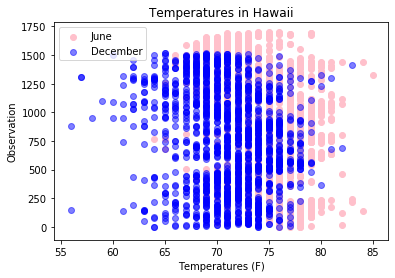

In [16]:
import matplotlib.pyplot as plt

y_j = []
for temp in range(len(june_temperatures)):
    y_j.append(temp)

y_d = []
for temp in range(len(dec_temperatures)):
    y_d.append(temp)

plt.scatter(june_temperatures, y_j, color='pink', alpha=1)
plt.scatter(dec_temperatures, y_d, color = "blue", alpha=0.5)
plt.title("Temperatures in Hawaii")
plt.legend(labels=["June", "December"])
plt.xlabel("Temperatures (F)")
plt.ylabel("Observation")
plt.show()